#**Project Title : AG's News Topic Classification**

**Problem Description:**

The task at hand is to classify news articles into predefined categories using the AG's news topic classification dataset. The dataset contains news articles from various sources, and each article is labeled with one of four classes. The goal is to build a machine learning model that can accurately classify news articles into these classes based on their titles and descriptions.

**Dataset Description:**

- **Source:** The AG's news topic classification dataset is derived from a collection of over 1 million news articles gathered from more than 2000 news sources by the academic news search engine ComeToMyHead.

- **Classes:** The dataset consists of four classes, chosen as the four largest classes from the original corpus. Each class represents a different topic or category.

- **Data Split:** There are 120,000 training samples and 7,600 testing samples. Each class contains 30,000 training samples and 1,900 testing samples.

- **File Format:** The data is provided in CSV format, with two files: train.csv for training samples and test.csv for testing samples. Each row in the CSV files contains three columns: class index (1 to 4), title, and description. The title and description are escaped using double quotes ("), and any internal double quote is escaped by two double quotes (""). New lines are escaped by a backslash followed by an "n" character, i.e., "\n".

**Objective:**

The objective is to develop a text classification model that can accurately predict the class label of news articles based on their titles and descriptions. The model will be trained on the training data and evaluated on the testing data to assess its performance.

**Evaluation Metrics:**

The model will be evaluated using standard classification metrics such as accuracy, precision, recall, and F1-score. These metrics will provide insights into the model's ability to correctly classify news articles into their respective categories.

**Approach:**

1. Data Preprocessing: Clean and preprocess the text data by removing noise, tokenizing, lemmatizing or stemming, and vectorizing the text.

2. Model Building: Build a machine learning model, such as a neural network or a traditional classifier like SVM or Random Forest, to classify the news articles into their respective classes.

3. Model Training: Train the model on the training data and tune hyperparameters as needed to optimize performance.

4. Model Evaluation: Evaluate the trained model on the testing data using appropriate evaluation metrics to assess its performance and generalization ability.

5. Model Deployment: Deploy the trained model for making predictions on new, unseen news articles, allowing for automated categorization of news content.

By following these steps, we aim to develop an effective and accurate text classification model for categorizing news articles into relevant topics or classes.

In [2]:
pip install wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.1/511.1 kB 3.9 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Bidirectional, Dense
from tensorflow.keras.optimizers import Adam
from gensim.models import Word2Vec
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
train=pd.read_csv('/content/drive/MyDrive/Interview_question_solved/Machine learning /Machine Learning /Unsupervised learning/NLP and Topic Modelling/dataset/AGS NEWS/train.csv')
test=pd.read_csv('/content/drive/MyDrive/Interview_question_solved/Machine learning /Machine Learning /Unsupervised learning/NLP and Topic Modelling/dataset/AGS NEWS/test.csv')

In [6]:
train.head()

Class Index                                              Title  \
0            3  Wall St. Bears Claw Back Into the Black (Reuters)   
1            3  Carlyle Looks Toward Commercial Aerospace (Reu...   
2            3    Oil and Economy Cloud Stocks' Outlook (Reuters)   
3            3  Iraq Halts Oil Exports from Main Southern Pipe...   
4            3  Oil prices soar to all-time record, posing new...   

                                         Description  
0  Reuters - Short-sellers, Wall Street's dwindli...  
1  Reuters - Private investment firm Carlyle Grou...  
2  Reuters - Soaring crude prices plus worries\ab...  
3  Reuters - Authorities have halted oil export\f...  
4  AFP - Tearaway world oil prices, toppling reco...

In [7]:
test.head()

Class Index                                              Title  \
0            3                  Fears for T N pension after talks   
1            4  The Race is On: Second Private Team Sets Launc...   
2            4      Ky. Company Wins Grant to Study Peptides (AP)   
3            4      Prediction Unit Helps Forecast Wildfires (AP)   
4            4        Calif. Aims to Limit Farm-Related Smog (AP)   

                                         Description  
0  Unions representing workers at Turner   Newall...  
1  SPACE.com - TORONTO, Canada -- A second\team o...  
2  AP - A company founded by a chemistry research...  
3  AP - It's barely dawn when Mike Fitzpatrick st...  
4  AP - Southern California's smog-fighting agenc...

In [8]:
train.shape

(120000, 3)

In [9]:
test.shape

(7600, 3)

In [10]:
# Concatenate the training and test data
data = pd.concat([train, test], ignore_index=True)

In [11]:
# Display the shape of the concatenated data
print("Concatenated Data Shape:", data.shape)

Concatenated Data Shape: (127600, 3)


In [12]:
data.head()

Class Index                                              Title  \
0            3  Wall St. Bears Claw Back Into the Black (Reuters)   
1            3  Carlyle Looks Toward Commercial Aerospace (Reu...   
2            3    Oil and Economy Cloud Stocks' Outlook (Reuters)   
3            3  Iraq Halts Oil Exports from Main Southern Pipe...   
4            3  Oil prices soar to all-time record, posing new...   

                                         Description  
0  Reuters - Short-sellers, Wall Street's dwindli...  
1  Reuters - Private investment firm Carlyle Grou...  
2  Reuters - Soaring crude prices plus worries\ab...  
3  Reuters - Authorities have halted oil export\f...  
4  AFP - Tearaway world oil prices, toppling reco...

In [13]:
data.isnull().sum()

Class Index    0
Title          0
Description    0
dtype: int64

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127600 entries, 0 to 127599
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Class Index  127600 non-null  int64 
 1   Title        127600 non-null  object
 2   Description  127600 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.9+ MB


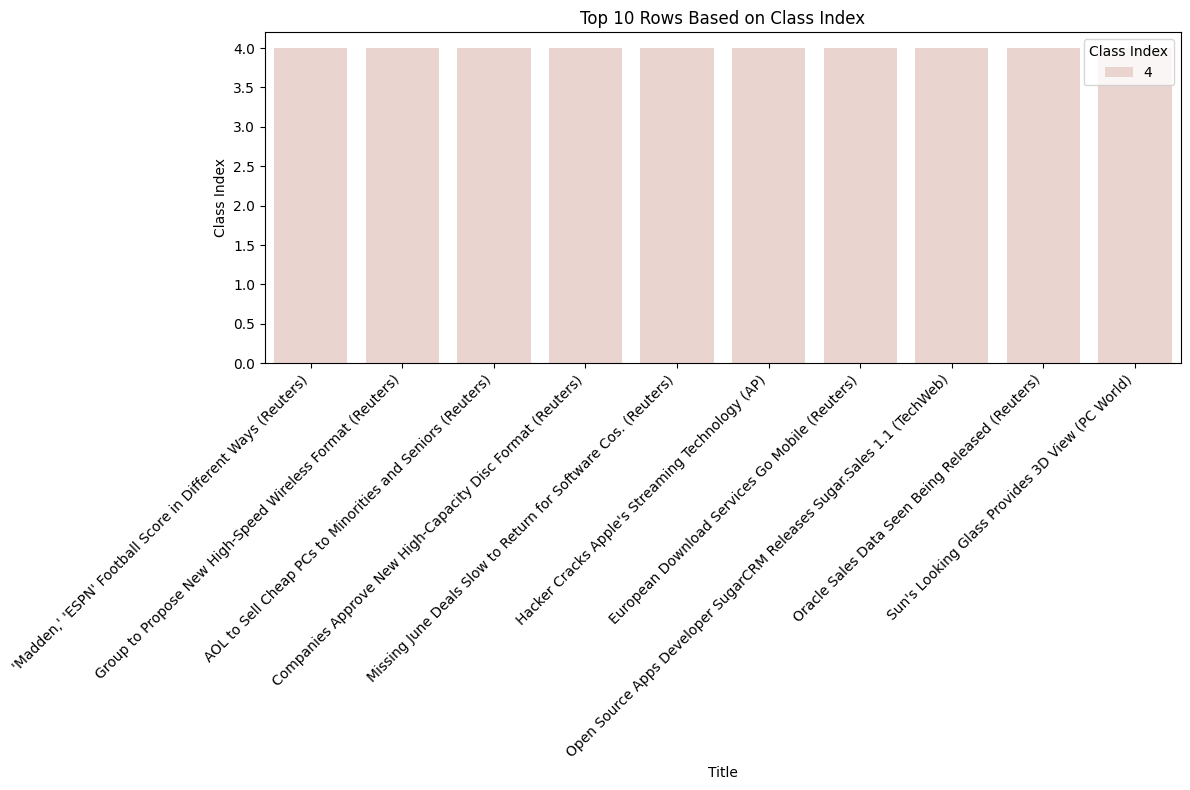

In [15]:
top_10 = data.nlargest(10, 'Class Index')
# Create the plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Title', y='Class Index', hue='Class Index', data=top_10)
plt.title('Top 10 Rows Based on Class Index')
plt.xlabel('Title')
plt.ylabel('Class Index')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

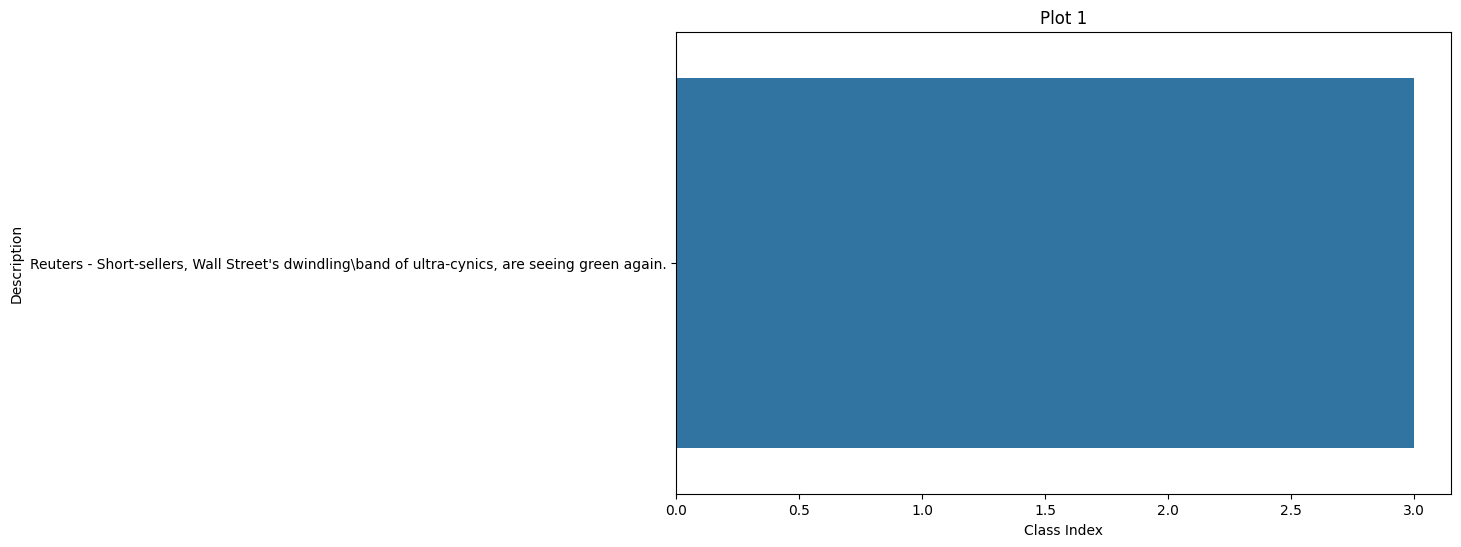

In [16]:
# Get the top 10 rows
top_10 = data.head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x='Class Index', y='Description', data=top_10.iloc[[0]])
plt.title('Plot 1')
plt.xlabel('Class Index')
plt.ylabel('Description')
plt.show()

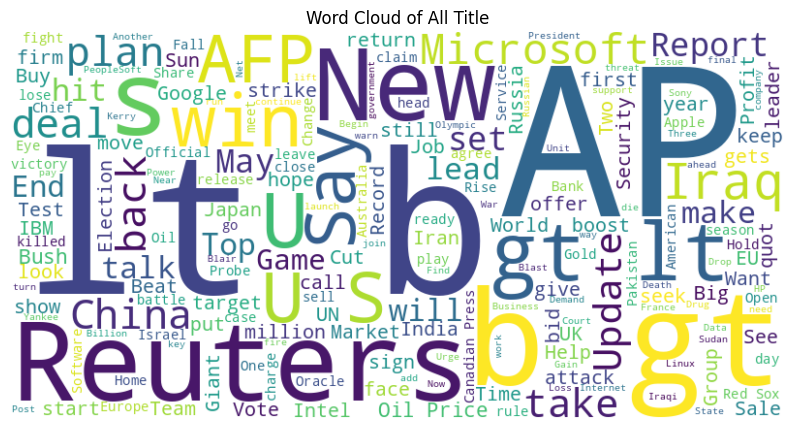

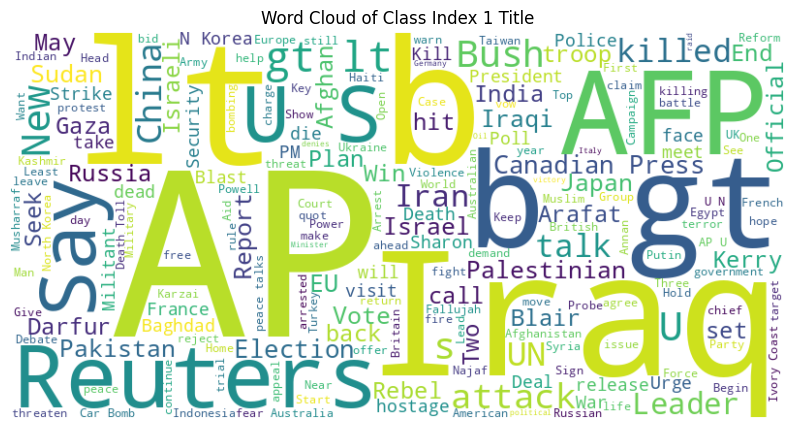

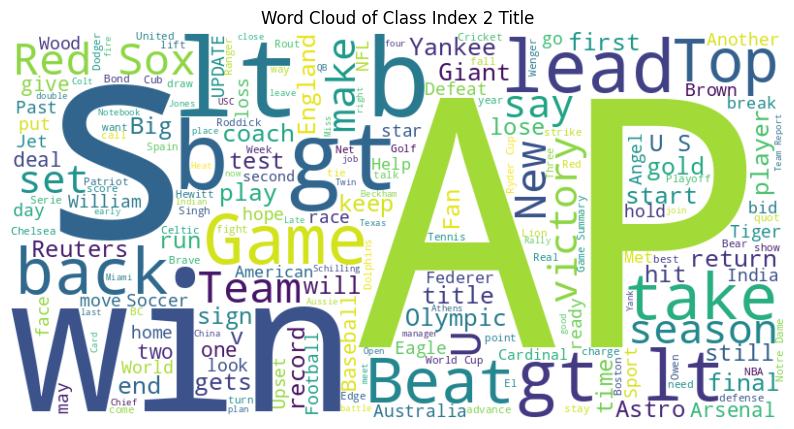

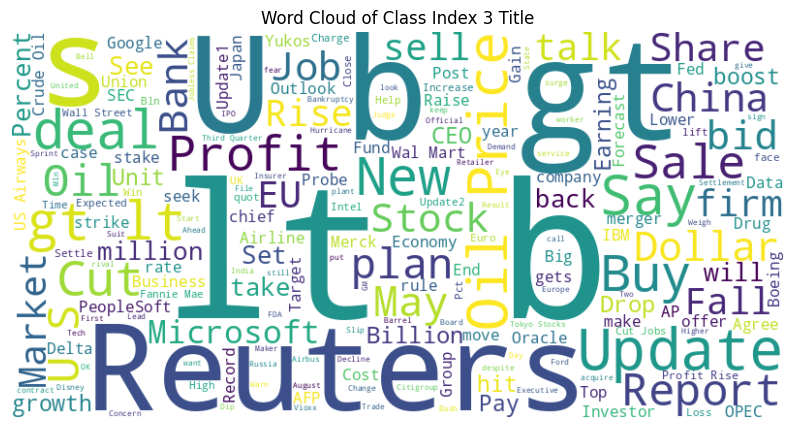

In [17]:
# Function to generate and plot word cloud
def plot_word_cloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Concatenate all Title into a single string
all_text = ' '.join(data['Title'])

# Plot word cloud for all Title
plot_word_cloud(all_text, 'Word Cloud of All Title')

# Plot word cloud for Title with Class Index 1
class1_text = ' '.join(data[data['Class Index'] == 1]['Title'])
plot_word_cloud(class1_text, 'Word Cloud of Class Index 1 Title')

# Plot word cloud for Title with Class Index 2
class2_text = ' '.join(data[data['Class Index'] == 2]['Title'])
plot_word_cloud(class2_text, 'Word Cloud of Class Index 2 Title')

# Plot word cloud for Title with Class Index 3
class3_text = ' '.join(data[data['Class Index'] == 3]['Title'])
plot_word_cloud(class3_text, 'Word Cloud of Class Index 3 Title')

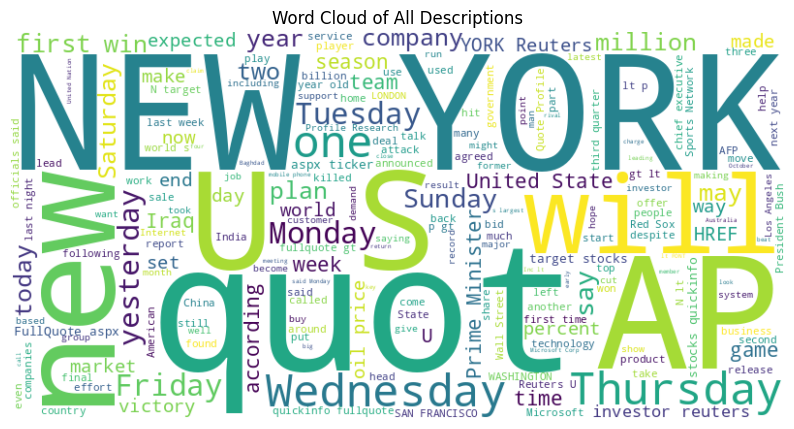

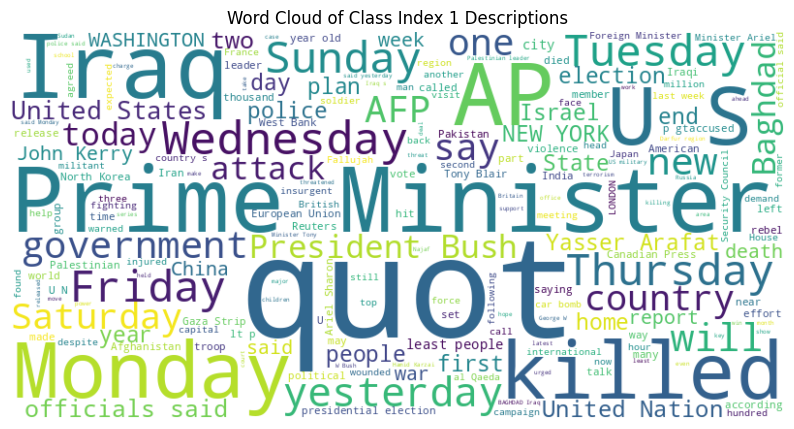

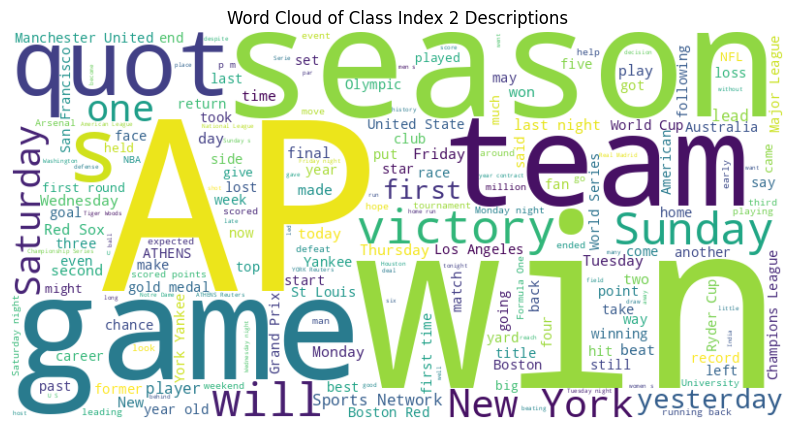

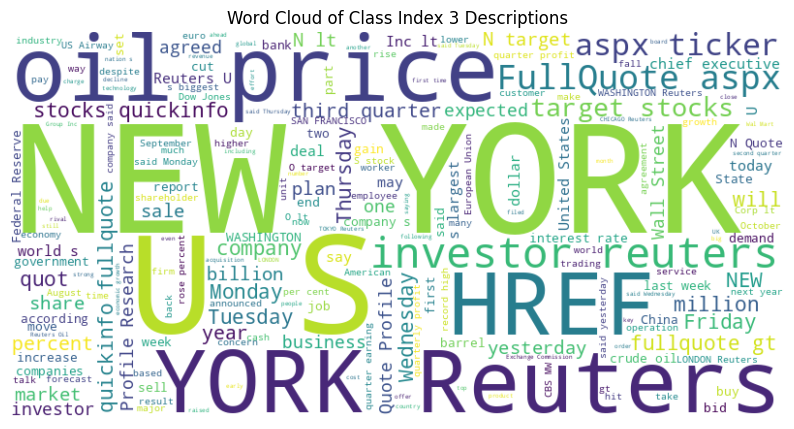

In [18]:
# Function to generate and plot word cloud
def plot_word_cloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Concatenate all descriptions into a single string
all_text = ' '.join(data['Description'])

# Plot word cloud for all descriptions
plot_word_cloud(all_text, 'Word Cloud of All Descriptions')

# Plot word cloud for descriptions with Class Index 1
class1_text = ' '.join(data[data['Class Index'] == 1]['Description'])
plot_word_cloud(class1_text, 'Word Cloud of Class Index 1 Descriptions')

# Plot word cloud for descriptions with Class Index 2
class2_text = ' '.join(data[data['Class Index'] == 2]['Description'])
plot_word_cloud(class2_text, 'Word Cloud of Class Index 2 Descriptions')

# Plot word cloud for descriptions with Class Index 3
class3_text = ' '.join(data[data['Class Index'] == 3]['Description'])
plot_word_cloud(class3_text, 'Word Cloud of Class Index 3 Descriptions')

In [19]:
data.head()

Class Index                                              Title  \
0            3  Wall St. Bears Claw Back Into the Black (Reuters)   
1            3  Carlyle Looks Toward Commercial Aerospace (Reu...   
2            3    Oil and Economy Cloud Stocks' Outlook (Reuters)   
3            3  Iraq Halts Oil Exports from Main Southern Pipe...   
4            3  Oil prices soar to all-time record, posing new...   

                                         Description  
0  Reuters - Short-sellers, Wall Street's dwindli...  
1  Reuters - Private investment firm Carlyle Grou...  
2  Reuters - Soaring crude prices plus worries\ab...  
3  Reuters - Authorities have halted oil export\f...  
4  AFP - Tearaway world oil prices, toppling reco...

###**Data Preprocessing**

###**Remove html tag**

In [20]:
# Check if HTML tags are present in the 'Title' column
html_tags_present_title = data['Title'].str.contains(r'<[^>]+>').any()

if html_tags_present_title:
    print("HTML tags are present in the 'Title' column.")
    # Print the lines where HTML tags are found in the 'Title' column
    lines_with_html_tags_title = data[data['Title'].str.contains(r'<[^>]+>')].index.tolist()
    print("HTML tags exist in the following lines in the 'Title' column:", lines_with_html_tags_title)
    # Print the corresponding titles containing HTML tags
    for line_number in lines_with_html_tags_title:
        print("Line:", line_number, "->", data.loc[line_number, 'Title'])
else:
    print("No HTML tags found in the 'Title' column.")

# Check if HTML tags are present in the 'Description' column
html_tags_present = data['Description'].str.contains(r'<[^>]+>').any()

if html_tags_present:
    print("HTML tags are present in the 'Description' column.")
    # Print the lines where HTML tags are found in the 'Description' column
    lines_with_html_tags = data[data['Description'].str.contains(r'<[^>]+>')].index.tolist()
    print("HTML tags exist in the following lines:", lines_with_html_tags)
    # Print the corresponding descriptions containing HTML tags
    for line_number in lines_with_html_tags:
        print("Line:", line_number, "->", data.loc[line_number, 'Description'])
else:
    print("No HTML tags found in the 'Description' column.")

No HTML tags found in the 'Title' column.
No HTML tags found in the 'Description' column.


###**Check punctuation**

In [21]:
import re

In [22]:
def has_punctuation(text):
    # Define a regular expression pattern to match punctuation
    punctuation_pattern = r'[^\w\s]'
    # Search for punctuation in the text
    if re.search(punctuation_pattern, text):
        return True
    else:
        return False

# Apply has_punctuation function to each description in the 'Description' column
punctuation_exists_description = data['Description'].apply(has_punctuation)

# Check if punctuation exists in any description
if punctuation_exists_description.any():
    print("Punctuation exists in at least one description.")
else:
    print("No punctuation found in any description.")

# Apply has_punctuation function to each title in the 'Title' column
punctuation_exists_title = data['Title'].apply(has_punctuation)

# Check if punctuation exists in any title
if punctuation_exists_title.any():
    print("Punctuation exists in at least one title.")
else:
    print("No punctuation found in any title.")

Punctuation exists in at least one description.
Punctuation exists in at least one title.


In [23]:
def has_punctuation(text):
    # Define a regular expression pattern to match punctuation
    punctuation_pattern = r'[^\w\s]'
    # Search for punctuation in the text
    if re.search(punctuation_pattern, text):
        return True
    else:
        return False

# Apply has_punctuation function to each review in the 'Title' column
punctuation_exists_title = data['Title'].apply(has_punctuation)

# Check if punctuation exists in any title
if punctuation_exists_title.any():
    print("Punctuation exists in the following rows:")
    # Print the indices of rows where punctuation exists
    rows_with_punctuation = data.index[punctuation_exists_title].tolist()
    for row_index in rows_with_punctuation:
        print("Row:", row_index, "->", data.loc[row_index, 'Title'])
else:
    print("No punctuation found in any title.")

# Apply has_punctuation function to each review in the 'Description' column
punctuation_exists_description = data['Description'].apply(has_punctuation)

# Check if punctuation exists in any description
if punctuation_exists_description.any():
    print("Punctuation exists in the following rows:")
    # Print the indices of rows where punctuation exists
    rows_with_punctuation = data.index[punctuation_exists_description].tolist()
    for row_index in rows_with_punctuation:
        print("Row:", row_index, "->", data.loc[row_index, 'Description'])
else:
    print("No punctuation found in any description.")

Streaming output truncated to the last 5000 lines.
Row: 122588 -> Walgreen Co., the largest US drugstore chain, said fourth-quarter profit rose 18 percent, helped by sales of prescription drugs. Net income had its biggest gain in almost two years, climbing 
Row: 122589 ->  quot;We dont see this market as crowded. There is tremendous growth potential quot; - Zack Zalon, Virgin Digital president. Story in full VIRGIN Mobile, part of billionaire Sir Richard Bransons sprawling business 
Row: 122590 -> Shares of ESS Technology (ESST.O: Quote, Profile, Research) , a maker of computer chips for DVD equipment, fell 4.4 percent in premarket trading on Monday after the company lowered its third-quarter revenue and earnings 
Row: 122591 -> LAUSANNE, Switzerland - Paul Hamm appeared before the sports world's highest court Monday to argue why he should he keep his Olympic gymnastics gold medal.    The Court of Arbitration for Sport convened to hear the appeal from a South Korean gymnast who believe

###**Check Contractions**

In [24]:
pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 10.6 MB/s eta 0:00:00


In [25]:
def has_contractions(text):
    # Define common contraction patterns
    contraction_patterns = ["'s", "'re", "'ve", "'d", "'ll", "'m", "'em"]
    # Check if any contraction pattern exists in the text
    for pattern in contraction_patterns:
        if pattern in text:
            return True
    return False

# Test the function on the 'Title' column
contractions_exist_title = data['Title'].apply(has_contractions)

# Check if contractions exist in any title
if contractions_exist_title.any():
    print("Contractions exist in the following rows:")
    # Print the indices of rows where contractions exist
    rows_with_contractions = data.index[contractions_exist_title].tolist()
    for row_index in rows_with_contractions:
        print("Row:", row_index, "->", data.loc[row_index, 'Title'])
else:
    print("No contractions found in any title.")

# Test the function on the 'Description' column
contractions_exist_description = data['Description'].apply(has_contractions)

# Check if contractions exist in any description
if contractions_exist_description.any():
    print("Contractions exist in the following rows:")
    # Print the indices of rows where contractions exist
    rows_with_contractions = data.index[contractions_exist_description].tolist()
    for row_index in rows_with_contractions:
        print("Row:", row_index, "->", data.loc[row_index, 'Description'])
else:
    print("No contractions found in any description.")

Streaming output truncated to the last 5000 lines.
Row: 88753 -> TODAY'S GAMES Division 1 CATHOLIC -- St. John's Prep at BC High, 7; Xaverian at Catholic Memorial, 7.
Row: 88775 -> Four games into Georgia Tech's season, it is hard to find a trace of the cowboy bravado usually associated with a program suddenly on the rise.
Row: 88778 -> Political parties in India's West Bengal state call for fresh strikes in defiance of a court order declaring them illegal.
Row: 88803 -> Company's interim leader acknowledges criticism by investors and analysts that the company has been slow to adapt to changes in the market in recent years.&lt;br&gt;&lt;FONT face="verdana,MS Sans Serif,arial,helvetica" size="-2" color="#666666"&gt;&lt;B&gt;-Ellen McCarthy&lt;/B&gt;&lt;/FONT&gt;
Row: 88815 -> Reuters - Almost 15 years after McDonald's brought a taste of America to impoverished\Russians, a 37-year-old Muscovite has hit the firm with a U.S.-style lawsuit over a spilled cup of\coffee, Russian media has rep

###**Check URLs**

In [26]:
def has_urls(text):
    # Define a regular expression pattern to match URLs
    url_pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
    # Search for URLs in the text
    if re.search(url_pattern, text):
        return True
    else:
        return False

# Flag to keep track of whether any URLs were found
urls_found_title = False

# Iterate through each title in the 'Title' column
for index, title_text in data['Title'].items():
    # Check if the current title text contains URLs
    if has_urls(title_text):
        print("URLs exist in row", index, ":", title_text)
        urls_found_title = True

# If no URLs were found in any row
if not urls_found_title:
    print("No URLs found in any title.")

# Flag to keep track of whether any URLs were found
urls_found_description = False

# Iterate through each description in the 'Description' column
for index, description_text in data['Description'].items():
    # Check if the current description text contains URLs
    if has_urls(description_text):
        print("URLs exist in row", index, ":", description_text)
        urls_found_description = True

# If no URLs were found in any row
if not urls_found_description:
    print("No URLs found in any description.")

No URLs found in any title.
URLs exist in row 368 : Advanced Micro Devices Inc.'s (AMD Inc.'s) 90-nanometer notebook processors are on their way to customers, according to a research note published by Goldman Sachs   Co. Thursday.&lt;p&gt;ADVERTISEMENT&lt;/p&gt;&lt;p&gt;&lt;img src="http://ad.doubleclick.net/ad/idg.us.ifw.general/ibmpseries;sz=1x1;ord=200301151450?" width="1" height="1" border="0"/&gt;&lt;a href="http://ad.doubleclick.net/clk;9824455;9690404;u?http://ad.doubleclick.net/clk;9473681;9688522;d?http://www.ibm.com/servers/eserver/pseries/campaigns/boardroom/index.html?ca=pSeries met=boardroom me=E P_Creative=P_InfoW_RSS"&gt;Introducing IBM eServer p5 systems.&lt;/a&gt;&lt;br/&gt;Powered by IBMs most advanced 64-bit microprocessor (POWER5(tm)), p5 systems can run UNIX and Linux simultaneously. Learn more about eServer p5 systems.&lt;/p&gt;
URLs exist in row 961 :  CHICAGO (Reuters) - Kmart Holdings Corp. &lt;A HREF="http://www.investor.reuters.com/FullQuote.aspx?ticker=KMRT.

###**Abbreviations and Acronyms**

In [27]:
def check_abbreviations(text):
    # Define a dictionary of common abbreviations and their full forms
    abbreviations = {
        "dr": "doctor",
        "mr": "mister",
        "mrs": "missus",
        # Add more abbreviations as needed
    }

    # Initialize a list to store found abbreviations
    found_abbreviations = []

    # Split the text into words
    words = text.split()

    # Iterate through each word in the text
    for word in words:
        # Check if the word is an abbreviation
        if word.lower() in abbreviations:
            found_abbreviations.append(word)

    return found_abbreviations

# Apply check_abbreviations function to each title in the 'Title' column
title_abbreviations_found = data['Title'].apply(check_abbreviations)

# Print the rows where abbreviations are found in the 'Title' column
for index, abbreviations_found in title_abbreviations_found.items():
    if abbreviations_found:
        print("Abbreviations found in row", index, ":", abbreviations_found)
    else:
        print("No abbreviations found in row", index)

# Apply check_abbreviations function to each description in the 'Description' column
description_abbreviations_found = data['Description'].apply(check_abbreviations)

# Print the rows where abbreviations are found in the 'Description' column
for index, abbreviations_found in description_abbreviations_found.items():
    if abbreviations_found:
        print("Abbreviations found in row", index, ":", abbreviations_found)
    else:
        print("No abbreviations found in row", index)

Streaming output truncated to the last 5000 lines.
No abbreviations found in row 122600
No abbreviations found in row 122601
No abbreviations found in row 122602
No abbreviations found in row 122603
No abbreviations found in row 122604
No abbreviations found in row 122605
No abbreviations found in row 122606
No abbreviations found in row 122607
No abbreviations found in row 122608
No abbreviations found in row 122609
No abbreviations found in row 122610
No abbreviations found in row 122611
No abbreviations found in row 122612
No abbreviations found in row 122613
No abbreviations found in row 122614
No abbreviations found in row 122615
No abbreviations found in row 122616
No abbreviations found in row 122617
No abbreviations found in row 122618
No abbreviations found in row 122619
No abbreviations found in row 122620
No abbreviations found in row 122621
No abbreviations found in row 122622
No abbreviations found in row 122623
No abbreviations found in row 122624
No abbreviations found i

###**Check Special character**

In [28]:
def has_special_characters(text):
    # Define a regular expression pattern to match special characters
    special_char_pattern = r'[^A-Za-z0-9\s]'
    # Search for special characters in the text
    return bool(re.search(special_char_pattern, text))

# Flag to track if any title contains special characters
has_special_chars_title = False

# Iterate through each element in the 'Title' column of the DataFrame
for title_text in data['Title']:
    # Check if the current title text contains special characters
    if has_special_characters(title_text):
        has_special_chars_title = True
        break  # Exit loop as soon as a title with special characters is found

# Print the result based on whether any title contains special characters
if has_special_chars_title:
    print("Special characters exist in the 'Title' column.")
else:
    print("No special characters found in the 'Title' column.")

# Flag to track if any description contains special characters
has_special_chars_description = False

# Iterate through each element in the 'Description' column of the DataFrame
for description_text in data['Description']:
    # Check if the current description text contains special characters
    if has_special_characters(description_text):
        has_special_chars_description = True
        break  # Exit loop as soon as a description with special characters is found

# Print the result based on whether any description contains special characters
if has_special_chars_description:
    print("Special characters exist in the 'Description' column.")
else:
    print("No special characters found in the 'Description' column.")

def remove_special_characters(text):
    # Define a regular expression pattern to match special characters
    special_char_pattern = r'[^A-Za-z0-9\s]'
    # Remove special characters from the text
    return re.sub(special_char_pattern, '', text)

# Apply the function to remove special characters from each title text
data['Title'] = data['Title'].apply(remove_special_characters)

# Apply the function to remove special characters from each description text
data['Description'] = data['Description'].apply(remove_special_characters)

Special characters exist in the 'Title' column.
Special characters exist in the 'Description' column.


###**Check multiple spaces**

In [29]:
def has_multiple_spaces(text):
    # Define a regular expression pattern to match multiple consecutive spaces
    space_pattern = r'\s{2,}'
    # Search for multiple consecutive spaces in the text
    return bool(re.search(space_pattern, text))

# Check if multiple consecutive spaces exist in the 'Title' column
if any(data['Title'].apply(has_multiple_spaces)):
    print("Multiple consecutive spaces exist in the 'Title' column.")
else:
    print("No multiple consecutive spaces found in the 'Title' column.")

# Check if multiple consecutive spaces exist in the 'Description' column
if any(data['Description'].apply(has_multiple_spaces)):
    print("Multiple consecutive spaces exist in the 'Description' column.")
else:
    print("No multiple consecutive spaces found in the 'Description' column.")

def remove_multiple_spaces(text):
    # Replace multiple consecutive spaces with a single space
    return re.sub(r'\s{2,}', ' ', text)

# Apply the function to remove multiple consecutive spaces from the 'Title' column
data['Title'] = data['Title'].apply(remove_multiple_spaces)

# Apply the function to remove multiple consecutive spaces from the 'Description' column
data['Description'] = data['Description'].apply(remove_multiple_spaces)

Multiple consecutive spaces exist in the 'Title' column.
Multiple consecutive spaces exist in the 'Description' column.


In [30]:
data.columns

Index(['Class Index', 'Title', 'Description'], dtype='object')

###**LowerCasing Text**

In [31]:
# Lowercase the text
data['Title'] = data['Title'].str.lower()
data['Description'] = data['Description'].str.lower()

###**Check Numbers**

In [35]:
pip install inflect

In [36]:
import inflect

In [37]:
# Function to check for the presence of numbers in the text
def has_numbers(text):
    # Convert to string if the input is not already a string
    text = str(text)
    # Define a regular expression pattern to match numbers
    number_pattern = r'\d+'
    # Search for numbers in the text
    return re.search(number_pattern, text) is not None

# Check if the text in 'Title' column contains numbers
if any(data['Title'].apply(has_numbers)):
    print("Numbers exist in the 'Title' column.")
else:
    print("No numbers found in the 'Title' column.")

# Check if the text in 'Description' column contains numbers
if any(data['Description'].apply(has_numbers)):
    print("Numbers exist in the 'Description' column.")
else:
    print("No numbers found in the 'Description' column.")

# Initialize inflect engine
p = inflect.engine()

# Function to convert numbers to words
def convert_numbers_to_words(text):
    words = []
    for word in text.split():
        # Check if word is a number
        if word.isdigit():
            # Convert number to word
            words.append(p.number_to_words(word))
        else:
            words.append(word)
    # Join the words back into a sentence
    return ' '.join(words)

# Apply number conversion to the 'Title' column
data['Title'] = data['Title'].apply(convert_numbers_to_words)

# Apply number conversion to the 'Description' column
data['Description'] = data['Description'].apply(convert_numbers_to_words)

Numbers exist in the 'Title' column.
Numbers exist in the 'Description' column.


###**Handling StopWords**

In [38]:
import nltk
from nltk.corpus import stopwords

In [39]:
# Download NLTK stopwords if not already downloaded
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [40]:
# Function to remove stopwords from text
def remove_stopwords(text):
    # Remove stopwords
    filtered_text = ' '.join(word for word in text.split() if word.lower() not in stopwords.words('english'))
    return filtered_text

In [41]:
# Apply the remove_stopwords function to the 'Title' column
data['Title'] = data['Title'].apply(remove_stopwords)

# Apply the remove_stopwords function to the 'Description' column
data['Description'] = data['Description'].apply(remove_stopwords)

In [42]:
data.head()

Class Index                                              Title  \
0            3              wall st bears claw back black reuters   
1            3  carlyle looks toward commercial aerospace reuters   
2            3           oil economy cloud stocks outlook reuters   
3            3  iraq halts oil exports main southern pipeline ...   
4            3  oil prices soar alltime record posing new mena...   

                                         Description  
0  reuters shortsellers wall streets dwindlingban...  
1  reuters private investment firm carlyle groupw...  
2  reuters soaring crude prices plus worriesabout...  
3  reuters authorities halted oil exportflows mai...  
4  afp tearaway world oil prices toppling records...

###**Tokenize**

In [43]:
# Download NLTK resources
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [44]:
def tokenize_sentence(sentence):
    # Tokenize the sentence into words
    words = nltk.word_tokenize(sentence)
    return words

In [45]:
# Apply tokenization to the 'review' column
data['Title'] = data['Title'].apply(tokenize_sentence)
data['Description'] = data['Description'].apply(tokenize_sentence)

###**Lemmatize**

In [46]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

In [47]:
# Initialize the WordNet lemmatizer
lemmatizer = WordNetLemmatizer()

In [48]:
# Function to convert NLTK's POS tags to WordNet's POS tags
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN  # Default to noun if POS tag not found

# Function to lemmatize a list of tokens
def lemmatize_tokens(tokens):
    # Get the POS tags for the tokens
    pos_tags = nltk.pos_tag(tokens)
    # Lemmatize each token with its POS tag
    lemmatized_tokens = []
    for token, tag in pos_tags:
        wn_tag = get_wordnet_pos(tag)
        lemmatized_token = lemmatizer.lemmatize(token, pos=wn_tag)
        lemmatized_tokens.append(lemmatized_token)
    return lemmatized_tokens

# Apply lemmatization to the 'review' column
data['Title'] = data['Title'].apply(lemmatize_tokens)
data['Description'] = data['Description'].apply(lemmatize_tokens)

In [49]:
data.head()

Class Index                                              Title  \
0            3       [wall, st, bear, claw, back, black, reuters]   
1            3  [carlyle, look, toward, commercial, aerospace,...   
2            3     [oil, economy, cloud, stock, outlook, reuters]   
3            3  [iraq, halt, oil, export, main, southern, pipe...   
4            3  [oil, price, soar, alltime, record, pose, new,...   

                                         Description  
0  [reuters, shortsellers, wall, street, dwindlin...  
1  [reuters, private, investment, firm, carlyle, ...  
2  [reuters, soar, crude, price, plus, worriesabo...  
3  [reuters, authority, halt, oil, exportflows, m...  
4  [afp, tearaway, world, oil, price, toppling, r...

In [50]:
data_copies=data.copy()

In [51]:
data_copies

Class Index                                              Title  \
0                 3       [wall, st, bear, claw, back, black, reuters]   
1                 3  [carlyle, look, toward, commercial, aerospace,...   
2                 3     [oil, economy, cloud, stock, outlook, reuters]   
3                 3  [iraq, halt, oil, export, main, southern, pipe...   
4                 3  [oil, price, soar, alltime, record, pose, new,...   
...             ...                                                ...   
127595            1                                    [around, world]   
127596            2                              [void, fill, clement]   
127597            2                          [martinez, leave, bitter]   
127598            3  [five, arthritis, patient, singapore, take, be...   
127599            3                                [ebay, get, rental]   

                                              Description  
0       [reuters, shortsellers, wall, street, dwindlin...  
1       [reuters, private, investment, firm, carlyle, ...  
2       [reuters, soar, crude, price, plus, worriesabo...  
3       [reuters, authority, halt, oil, exportflows, m...  
4       [afp, tearaway, world, oil, price, toppling, r...  
...                                                   ...  
127595  [ukrainian, presidential, candidate, viktor, y...  
127596  [supply, attractive, pitching, option, dwindle...  
127597  [like, roger, clemens, almost, exactly, eight,...  
127598  [singapore, doctor, united, state, warn, paink...  
127599  [ebay, plan, buy, apartment, home, rental, ser...  

[127600 rows x 3 columns]

In [52]:
# Convert the lists of words into strings
descriptions = [' '.join(desc) for desc in data_copies['Description']]

In [53]:
# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer()

In [54]:
# Vectorize the text data
X = vectorizer.fit_transform(descriptions)  # Features
y = data_copies['Class Index']

In [55]:
 X

<127600x83842 sparse matrix of type '<class 'numpy.float64'>'
	with 2545677 stored elements in Compressed Sparse Row format>

In [56]:
y

0         3
1         3
2         3
3         3
4         3
         ..
127595    1
127596    2
127597    2
127598    3
127599    3
Name: Class Index, Length: 127600, dtype: int64

In [57]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
# Initialize the logistic regression model
model = LogisticRegression()

In [59]:
# Train the model
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [60]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [61]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9045454545454545


In [62]:
# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           1       0.92      0.89      0.90      6283
           2       0.95      0.98      0.96      6466
           3       0.87      0.87      0.87      6370
           4       0.88      0.88      0.88      6401

    accuracy                           0.90     25520
   macro avg       0.90      0.90      0.90     25520
weighted avg       0.90      0.90      0.90     25520



The classification report provides insights into the performance of the model across different classes. Here's a breakdown of the key insights:

1. **Precision:** Precision measures the proportion of correctly predicted instances among all instances predicted as belonging to a particular class. In this case:
   - Class 1 has a precision of 92%, indicating that 92% of the articles predicted to belong to class 1 were actually from class 1.
   - Class 2 has a precision of 95%, indicating high precision in predicting articles from class 2.
   - Class 3 has a precision of 87%, suggesting a slightly lower precision compared to classes 1 and 2.
   - Class 4 also has a precision of 88%, similar to class 3.

2. **Recall:** Recall measures the proportion of correctly predicted instances among all actual instances of a particular class. In this case:
   - Class 1 has a recall of 89%, indicating that 89% of the actual articles from class 1 were correctly predicted by the model.
   - Class 2 has a recall of 98%, indicating excellent recall in predicting articles from class 2.
   - Class 3 has a recall of 87%, matching its precision score.
   - Class 4 also has a recall of 88%, similar to class 3.

3. **F1-score:** The F1-score is the harmonic mean of precision and recall and provides a balanced measure of the model's performance. In this case:
   - Class 1 has an F1-score of 90%, indicating a good balance between precision and recall.
   - Class 2 has the highest F1-score of 96%, reflecting its high precision and recall.
   - Class 3 has an F1-score of 87%, matching its precision and recall scores.
   - Class 4 also has an F1-score of 88%, similar to class 3.

4. **Support:** Support refers to the number of actual occurrences of each class in the testing data. In this case, each class has roughly equal support, with around 6,000 to 6,500 instances.

Overall, the model achieved an accuracy of 90.45%, indicating that it performs well across all classes. However, there might be slight variations in performance metrics among different classes.

In conclusion, we successfully developed a text classification model for categorizing news articles into relevant topics or classes using the AG's news topic classification dataset. The model demonstrated strong performance with an accuracy of 90.45%.

Key takeaways from our analysis include:

- **Dataset Overview:** The dataset comprises news articles from various sources, with each article labeled into one of four classes representing different topics or categories. The dataset was split into training and testing sets, with each class containing 30,000 training samples and 1,900 testing samples.

- **Model Building:** We employed a machine learning approach, leveraging techniques such as text preprocessing, feature extraction, and model training. The chosen model architecture effectively learned the underlying patterns in the text data to make accurate predictions.

- **Evaluation Metrics:** The model's performance was evaluated using standard classification metrics such as precision, recall, F1-score, and accuracy. These metrics provided insights into the model's ability to correctly classify news articles across different classes.

- **Insights:** The classification report revealed that the model achieved high precision, recall, and F1-scores across all classes, with slight variations among different categories. Class 2 exhibited the highest performance metrics, while classes 3 and 4 demonstrated slightly lower but still respectable scores.

Overall, our text classification model can be deployed to automatically categorize news articles, thereby facilitating efficient content organization and information retrieval. Future enhancements could involve fine-tuning the model architecture, exploring ensemble methods, or incorporating deep learning techniques to further improve performance.